# Data Cleaning and Parsing

In this notebook:
* String manipulation
* Using Factors
* Tidy data
* Missing data
* XML/HTML parsing

In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## String manipulation

In [40]:
library(stringr)

In [41]:
string1 <- "Hello world"
string2 <- "I can't help but use contractions"
string3 <- 'Don\'t mind me, just making a quick escape'

In [4]:
writeLines(string3)

Don't mind me, just making a quick escape


In [5]:
str_length(string3)

[1] 41

In [6]:
str_c("Prognosis", "Negative", sep = ": ")

[1] "Prognosis: Negative"

In [7]:
str_c(c(string1, string2, string3), collapse = " & ")

[1] "Hello world & I can't help but use contractions & Don't mind me, just making a quick escape"

In [8]:
str_sort(c(string1, string2, string3))

[1] "Don't mind me, just making a quick escape"
[2] "Hello world"                              
[3] "I can't help but use contractions"

In [9]:
str_sub(string3, 21, 26)

[1] "making"

In [10]:
str_trim(str_c(string1, "    "))

[1] "Hello world"

The stringi package has a much more comprehensive function list.

## Factors

In [11]:
data()

In [12]:
df <- data.frame(VADeaths)
str(df)

'data.frame':	5 obs. of  4 variables:
 $ Rural.Male  : num  11.7 18.1 26.9 41 66
 $ Rural.Female: num  8.7 11.7 20.3 30.9 54.3
 $ Urban.Male  : num  15.4 24.3 37 54.6 71.1
 $ Urban.Female: num  8.4 13.6 19.3 35.1 50


In [13]:
head(df)

,Rural.Male,Rural.Female,Urban.Male,Urban.Female
50-54,11.7,8.7,15.4,8.4
55-59,18.1,11.7,24.3,13.6
60-64,26.9,20.3,37.0,19.3
65-69,41.0,30.9,54.6,35.1
70-74,66.0,54.3,71.1,50.0


In [14]:
df <- df %>% mutate(age_range = rownames(df))
df

Rural.Male,Rural.Female,Urban.Male,Urban.Female,age_range
11.7,8.7,15.4,8.4,50-54
18.1,11.7,24.3,13.6,55-59
26.9,20.3,37.0,19.3,60-64
41.0,30.9,54.6,35.1,65-69
66.0,54.3,71.1,50.0,70-74


In [15]:
str(df)

'data.frame':	5 obs. of  5 variables:
 $ Rural.Male  : num  11.7 18.1 26.9 41 66
 $ Rural.Female: num  8.7 11.7 20.3 30.9 54.3
 $ Urban.Male  : num  15.4 24.3 37 54.6 71.1
 $ Urban.Female: num  8.4 13.6 19.3 35.1 50
 $ age_range   : chr  "50-54" "55-59" "60-64" "65-69" ...


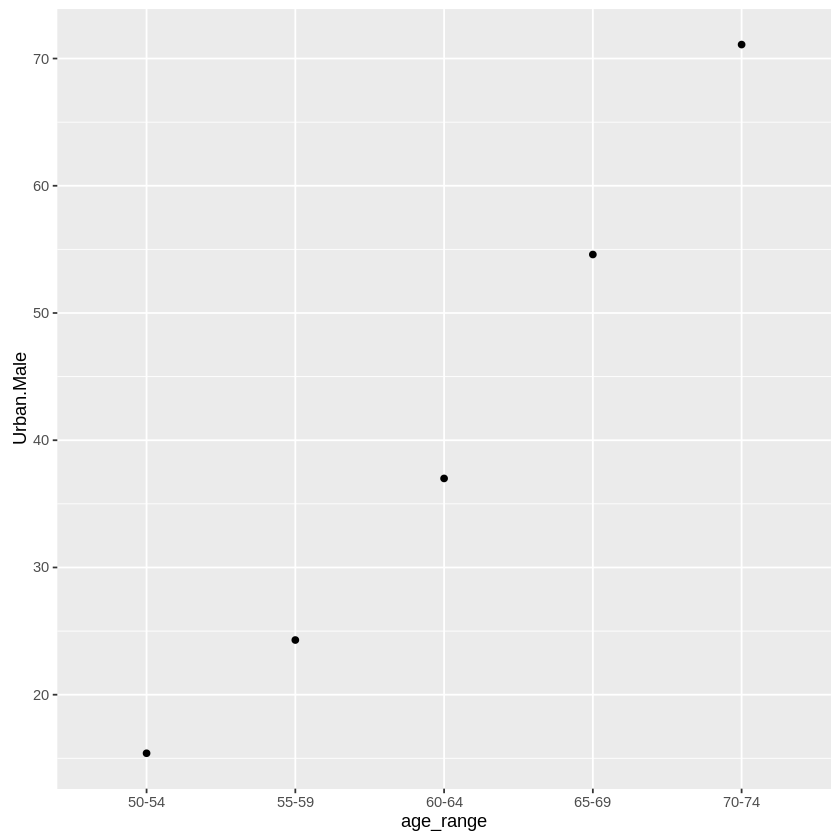

In [16]:
ggplot(df) +
  geom_point(aes(x = age_range, y = Urban.Male))

In [17]:
# Define age_range as a factor with levels, then replot
levels <- df$age_range %>% sort(decreasing = TRUE)
print(levels)

[1] "70-74" "65-69" "60-64" "55-59" "50-54"


In [18]:
df$age_range <- factor(df$age_range, levels = levels)

## Tidying

A tidy dataset has:
1. One observation per row
1. One feature per column
1. Each value in its own cell

Let's look at the canonical example where "a" and "b" represent different drugs and we have dosage/heart rate measurements.

In [42]:
library(tidyr)

In [43]:
messy <- data.frame(
  name = c("Wilbur", "Petunia", "Gregory"),
  a = c("50/67", "25/80", "10/64"),
  b = c("50/56", "25/90", "10/50")
)
messy

name,a,b
Wilbur,50/67,50/56
Petunia,25/80,25/90
Gregory,10/64,10/50


We can use `gather()` to take columns which represent different observations and reshape them to follow tidy rules.

In [44]:
gathered <- messy %>%
  gather(a:b, key = drug, value = measurements)
gathered

Warning message:
“attributes are not identical across measure variables; they will be dropped”

name,drug,measurements
Wilbur,a,50/67
Petunia,a,25/80
Gregory,a,10/64
Wilbur,b,50/56
Petunia,b,25/90
Gregory,b,10/50


In [45]:
str(messy)
str(gathered)

'data.frame':	3 obs. of  3 variables:
 $ name: Factor w/ 3 levels "Gregory","Petunia",..: 3 2 1
 $ a   : Factor w/ 3 levels "10/64","25/80",..: 3 2 1
 $ b   : Factor w/ 3 levels "10/50","25/90",..: 3 2 1
'data.frame':	6 obs. of  3 variables:
 $ name        : Factor w/ 3 levels "Gregory","Petunia",..: 3 2 1 3 2 1
 $ drug        : chr  "a" "a" "a" "b" ...
 $ measurements: chr  "50/67" "25/80" "10/64" "50/56" ...


*Question*: How can I avoid this warning?

In [23]:
# The complement of gather() is spread()
gathered %>% spread(drug, measurements)

name,a,b
Gregory,10/64,10/50
Petunia,25/80,25/90
Wilbur,50/67,50/56


In [24]:
gathered %>% spread(measurements,drug)

name,10/50,10/64,25/80,25/90,50/56,50/67
Gregory,b,a,NA,NA,NA,NA
Petunia,NA,NA,a,b,NA,NA
Wilbur,NA,NA,NA,NA,b,a


*Question*: What will happen if I call `spread(measurements, drug)`?

*Exercise*: Tidy the example data below.

In [25]:
preg <- frame_data(
  ~pregnant, ~male, ~female,
  "yes",     NA,    10,
  "no",      20,    12
)

In [28]:
str(preg)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	2 obs. of  3 variables:
 $ pregnant: chr  "yes" "no"
 $ male    : num  NA 20
 $ female  : num  10 12


In [26]:
# If columns contain more than one observation, use separate()
separated <- gathered %>% 
  separate(measurements, into = c('dosage', 'heartrate'))
separated

name,drug,dosage,heartrate
Wilbur,a,50,67
Petunia,a,25,80
Gregory,a,10,64
Wilbur,b,50,56
Petunia,b,25,90
Gregory,b,10,50


*Exercise*: What if the values are separated by a more uncommon pattern. For example:

In [29]:
sales <- data.frame(
    rep = c('Jim', 'Dwight', 'Stanley'),
    order = c('1998 ## 43,961 ## Malaysia', '1999 ## 22,309 ## Scotland', '2001 ## 78,230 ## Chile')
    )
sales

rep,order
Jim,"1998 ## 43,961 ## Malaysia"
Dwight,"1999 ## 22,309 ## Scotland"
Stanley,"2001 ## 78,230 ## Chile"


In [33]:
# Your code here
separated_sales <- sales %>% 
  separate(order, into = c('year', 'amount','country'),sep=('##'),convert=TRUE)
separated_sales

rep,year,amount,country
Jim,1998,"43,961",Malaysia
Dwight,1999,"22,309",Scotland
Stanley,2001,"78,230",Chile


In [32]:
?separate

How do we prevent the new columns from being the wrong type?

In [34]:
# unite() is the complement of separate()
separated %>% unite(injection, dosage, drug, sep = "mL ")

name,injection,heartrate
Wilbur,50mL a,67
Petunia,25mL a,80
Gregory,10mL a,64
Wilbur,50mL b,56
Petunia,25mL b,90
Gregory,10mL b,50


## Missing data

It's important to think about how you want to handle missing data early. For example, in `separate()` above, examine the `extra` and `fill` parameters. What are they meant for?

We should also think about the case where the data is marked NA vs. the case where the data is simply not present.

In [46]:
stocks <- data_frame(
  year   = c(2015, 2015, 2015, 2015, 2016, 2016, 2016),
  qtr    = c(   1,    2,    3,    4,    2,    3,    4),
  rev    = runif(7, min=0, max=5)
)
stocks[4, 'rev'] <- NA
stocks

year,qtr,rev
2015,1,4.6690630
2015,2,1.1881301
2015,3,0.2329165
2015,4,NA
2016,2,3.3834850
2016,3,4.2788826
2016,4,0.2746905


In [47]:
stocks %>% 
  spread(year, rev)

qtr,2015,2016
1,4.6690630,NA
2,1.1881301,3.3834850
3,0.2329165,4.2788826
4,NA,0.2746905


In [37]:
stocks %>%
  spread(year, rev) %>%
  gather(year, rev, `2015`:`2016`, na.rm = TRUE)

,qtr,year,rev
1,1,2015,0.02047183
2,2,2015,0.85101563
3,3,2015,1.46168102
6,2,2016,4.85172103
7,3,2016,1.24861716
8,4,2016,2.84396793


In [38]:
stocks %>% complete(year, qtr)

year,qtr,rev
2015,1,0.02047183
2015,2,0.85101563
2015,3,1.46168102
2015,4,NA
2016,1,NA
2016,2,4.85172103
2016,3,1.24861716
2016,4,2.84396793


In [39]:
stocks %>% fill(rev)

year,qtr,rev
2015,1,0.02047183
2015,2,0.85101563
2015,3,1.46168102
2015,4,1.46168102
2016,2,4.85172103
2016,3,1.24861716
2016,4,2.84396793


For more R packages that handle imputation, see
* MICE
* Amelia
* missForest
* Hmisc
* mi

# Parsing XML/HTML files or fragments with XML2

In [49]:
library(xml2)

In [50]:
# example 
catalog <- read_xml("http://www.xmlfiles.com/examples/cd_catalog.xml")
xml_url(catalog)

[1] "http://www.xmlfiles.com/examples/cd_catalog.xml"

In [51]:
catalog

{xml_document}
<CATALOG>
 [1] <CD>\n  <TITLE>Empire Burlesque</TITLE>\n  <ARTIST>Bob Dylan</ARTIST>\n  ...
 [2] <CD>\n  <TITLE>Hide your heart</TITLE>\n  <ARTIST>Bonnie Tylor</ARTIST>\ ...
 [3] <CD>\n  <TITLE>Greatest Hits</TITLE>\n  <ARTIST>Dolly Parton</ARTIST>\n  ...
 [4] <CD>\n  <TITLE>Still got the blues</TITLE>\n  <ARTIST>Gary More</ARTIST> ...
 [5] <CD>\n  <TITLE>Eros</TITLE>\n  <ARTIST>Eros Ramazzotti</ARTIST>\n  <COUN ...
 [6] <CD>\n  <TITLE>One night only</TITLE>\n  <ARTIST>Bee Gees</ARTIST>\n  <C ...
 [7] <CD>\n  <TITLE>Sylvias Mother</TITLE>\n  <ARTIST>Dr.Hook</ARTIST>\n  <CO ...
 [8] <CD>\n  <TITLE>Maggie May</TITLE>\n  <ARTIST>Rod Stewart</ARTIST>\n  <CO ...
 [9] <CD>\n  <TITLE>Romanza</TITLE>\n  <ARTIST>Andrea Bocelli</ARTIST>\n  <CO ...
[10] <CD>\n  <TITLE>When a man loves a woman</TITLE>\n  <ARTIST>Percy Sledge< ...
[11] <CD>\n  <TITLE>Black angel</TITLE>\n  <ARTIST>Savage Rose</ARTIST>\n  <C ...
[12] <CD>\n  <TITLE>1999 Grammy Nominees</TITLE>\n  <ARTIST>Many</ARTIST>

In [52]:
# print entire tree
 xml_structure(catalog) 

<CATALOG>
  <CD>
    <TITLE>
      {text}
    <ARTIST>
      {text}
    <COUNTRY>
      {text}
    <COMPANY>
      {text}
    <PRICE>
      {text}
    <YEAR>
      {text}
  <CD>
    <TITLE>
      {text}
    <ARTIST>
      {text}
    <COUNTRY>
      {text}
    <COMPANY>
      {text}
    <PRICE>
      {text}
    <YEAR>
      {text}
  <CD>
    <TITLE>
      {text}
    <ARTIST>
      {text}
    <COUNTRY>
      {text}
    <COMPANY>
      {text}
    <PRICE>
      {text}
    <YEAR>
      {text}
  <CD>
    <TITLE>
      {text}
    <ARTIST>
      {text}
    <COUNTRY>
      {text}
    <COMPANY>
      {text}
    <PRICE>
      {text}
    <YEAR>
      {text}
  <CD>
    <TITLE>
      {text}
    <ARTIST>
      {text}
    <COUNTRY>
      {text}
    <COMPANY>
      {text}
    <PRICE>
      {text}
    <YEAR>
      {text}
  <CD>
    <TITLE>
      {text}
    <ARTIST>
      {text}
    <COUNTRY>
      {text}
    <COMPANY>
      {text}
    <PRICE>
      {text}
    <YEAR>
      {text}
  <CD>
    <TITLE>
     

In [53]:
# extract parent tag
xml_name(catalog) %>% head

[1] "CATALOG"

In [54]:
# extract children
xml_children(catalog) %>% head

{xml_nodeset (6)}
[1] <CD>\n  <TITLE>Empire Burlesque</TITLE>\n  <ARTIST>Bob Dylan</ARTIST>\n   ...
[2] <CD>\n  <TITLE>Hide your heart</TITLE>\n  <ARTIST>Bonnie Tylor</ARTIST>\n ...
[3] <CD>\n  <TITLE>Greatest Hits</TITLE>\n  <ARTIST>Dolly Parton</ARTIST>\n   ...
[4] <CD>\n  <TITLE>Still got the blues</TITLE>\n  <ARTIST>Gary More</ARTIST>\ ...
[5] <CD>\n  <TITLE>Eros</TITLE>\n  <ARTIST>Eros Ramazzotti</ARTIST>\n  <COUNT ...
[6] <CD>\n  <TITLE>One night only</TITLE>\n  <ARTIST>Bee Gees</ARTIST>\n  <CO ...

In [55]:
# easily parse out all the text...
xml_text(catalog) %>% head

[1] "Empire BurlesqueBob DylanUSAColumbia10.901985Hide your heartBonnie TylorUKCBS Records9.901988Greatest HitsDolly PartonUSARCA9.901982Still got the bluesGary MoreUKVirgin redords10.201990ErosEros RamazzottiEUBMG9.901997One night onlyBee GeesUKPolydor10.901998Sylvias MotherDr.HookUKCBS8.101973Maggie MayRod StewartUKPickwick8.501990RomanzaAndrea BocelliEUPolydor10.801996When a man loves a womanPercy SledgeUSAAtlantic8.701987Black angelSavage RoseEUMega10.9019951999 Grammy NomineesManyUSAGrammy10.201999For the good timesKenny RogersUKMucik Master8.701995Big Willie styleWill SmithUSAColumbia9.901997Tupelo HoneyVan MorrisonUKPolydor8.201971SoulsvilleJorn HoelNorwayWEA7.901996The very best ofCat StevensUKIsland8.901990StopSam BrownUKA and M8.901988Bridge of SpiesT`PauUKSiren7.901987Private DancerTina TurnerUKCapitol8.901983Midt om nattenKim LarsenEUMedley7.801983Pavarotti Gala ConcertLuciano PavarottiUKDECCA9.901991The dock of the bayOtis ReddingUSAAtlantic7.901987Picture bookSimply RedEUElektra7.201985RedThe CommunardsUKLondon7.801987Unchain my heartJoe CockerUSAEMI8.201987"

In [56]:
# ... or individual nodes (using an XPath expression)...
xml_find_all(catalog, ".//TITLE") %>% head

{xml_nodeset (6)}
[1] <TITLE>Empire Burlesque</TITLE>
[2] <TITLE>Hide your heart</TITLE>
[3] <TITLE>Greatest Hits</TITLE>
[4] <TITLE>Still got the blues</TITLE>
[5] <TITLE>Eros</TITLE>
[6] <TITLE>One night only</TITLE>

In [57]:
# ... and possibly just the node text
xml_find_all(catalog, ".//TITLE") %>% xml_text %>% head

[1] "Empire Burlesque"    "Hide your heart"     "Greatest Hits"      
[4] "Still got the blues" "Eros"                "One night only"

In [58]:
# look within nested nodes (again, with an XPath expression)
xml_find_all(catalog, "CD/TITLE") %>% xml_text %>% head

[1] "Empire Burlesque"    "Hide your heart"     "Greatest Hits"      
[4] "Still got the blues" "Eros"                "One night only"

Details on `xml_find_all()`:
* uses XPath expressions:  http://www.w3schools.com/xsl/xpath_syntax.asp
    * `CD/TITLE` (child node only) vs. `CD//TITLE` (any level of descendant)
    * `//TAG` looks anywhere in document
    * `.//TAG` looks only beneath current node
    * node tags are case sensitive
* repeated nodes are automatically de-duplicated

Also see `xml_find_first()`

In [59]:
# debug 
xml_find_all(catalog, ".//TITLE") %>% xml_type %>% unique

[1] "element"

In [60]:
# another example: extract all countries
xml_find_all(catalog, ".//COUNTRY") %>% xml_text 

[1] "USA"    "UK"     "USA"    "UK"     "EU"     "UK"     "UK"     "UK"    
 [9] "EU"     "USA"    "EU"     "USA"    "UK"     "USA"    "UK"     "Norway"
[17] "UK"     "UK"     "UK"     "UK"     "EU"     "UK"     "USA"    "EU"    
[25] "UK"     "USA"

### XML2 details
* xml2 also supports modification and creation of XML nodes
* if you are dealing with namespaces (unique node identifiers), take a look at `xml_ns()`
Details are here: https://blog.rstudio.org/2016/07/05/xml2-1-0-0/

*Copyright &copy; 2016 The Data Incubator.  All rights reserved.*